In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [3]:
X, y = load_data()

In [4]:
print(X.shape, y.shape)

(1000, 400) (1000, 1)


In [5]:
print(y[0], y[-1])

[0] [1]


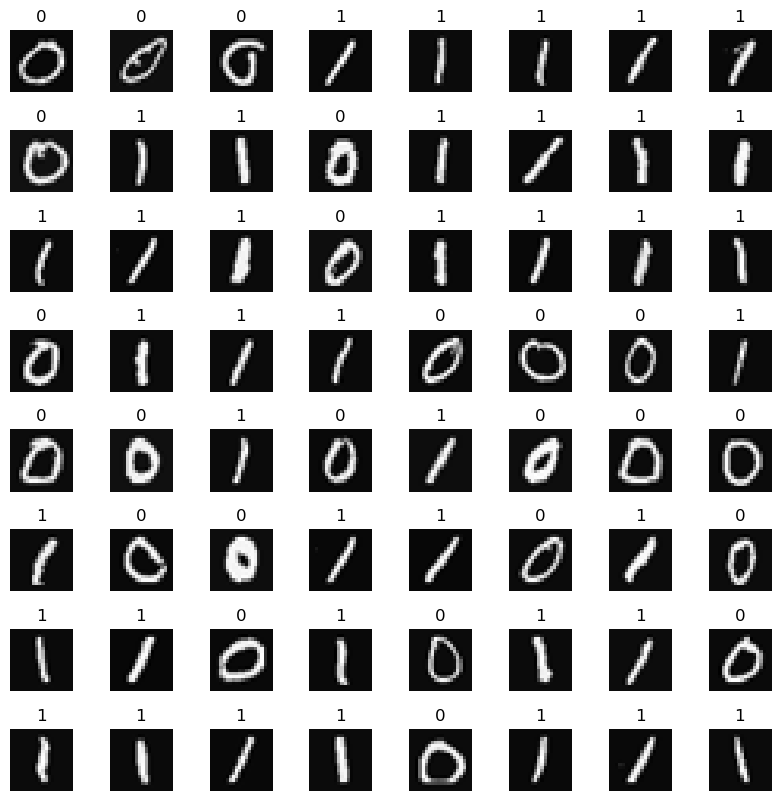

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8,8))
fig.tight_layout(pad = 0.1)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()

In [7]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        tf.keras.layers.Dense(25, activation='sigmoid'),
        tf.keras.layers.Dense(15, activation = 'sigmoid'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ], name='my_model'
)

Metal device set to: Apple M1


2022-10-10 18:09:06.818165: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-10 18:09:06.818399: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [9]:
from public_tests import *
test_c1(model)

All tests passed!


In [10]:
[layer1, layer2, layer3] = model.layers

In [12]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")

W1 shape = (400, 25), b1 shape = (25,)


In [13]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.32847664],
       [-0.3318132 ],
       [-0.49022847],
       [-0.20705917],
       [-0.16555256],
       [ 0.33870882],
       [-0.57537055],
       [ 0.43440193],
       [-0.2701599 ],
       [ 0.3134784 ],
       [ 0.5962091 ],
       [ 0.16521776],
       [ 0.4499367 ],
       [ 0.4444049 ],
       [ 0.07276702]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [14]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X, y,
    epochs=20
)

Epoch 1/20


2022-10-10 18:14:43.372348: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-10 18:14:43.520361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 3s 14ms/step - loss: 0.6225
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.4512
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.2944
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1932
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1363
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1027
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0813
Epoch 8/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0664
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0557
Epoch 10/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 11/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0416
Epoch 12/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0369
Epoch 13/20
32/32 [==============================] - 0s 4ms

In [15]:
prediction = model.predict(X[0].reshape(1, 400))
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1, 400))
print(f" predicting a one: {prediction}")

2022-10-10 18:16:20.516613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 305ms/step
 predicting a zero: [[0.01434329]]
1/1 [==============================] - 0s 9ms/step
 predicting a one: [[0.9877809]]


1/1 [==============================] - 0s 9ms/step


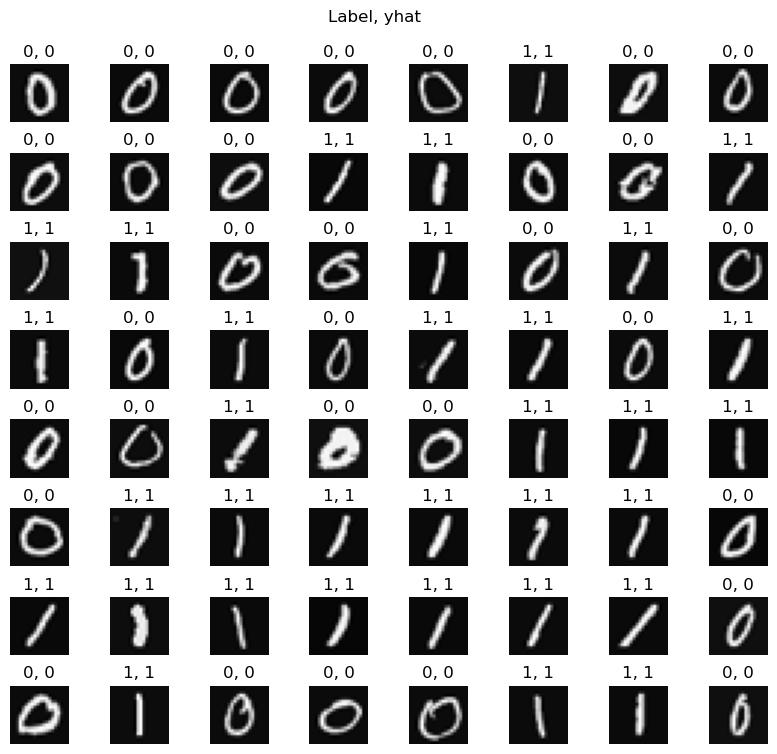

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8,8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    prediction = model.predict(X[random_index].reshape(1, 400))
    if prediction >= 0.5:
        yhat=1
    else:
        yhat=0
        
    ax.set_title(f"{y[random_index, 0]}, {yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat")
plt.show()

In [30]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [31]:
def my_dense(a_in, W, b, g):
    n, j = W.shape
    z = ((a_in.reshape((1, n)) @ W) + b.reshape(1, j))
    z = np.reshape(z, -1)
    a_out = g(z)
    return a_out

In [23]:
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

tf.Tensor([0.54735762 0.57932425 0.61063923], shape=(3,), dtype=float64)


In [24]:
test_c2(my_dense)

All tests passed!


In [25]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x, W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return a3

In [26]:
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

1/1 [==============================] - 0s 11ms/step


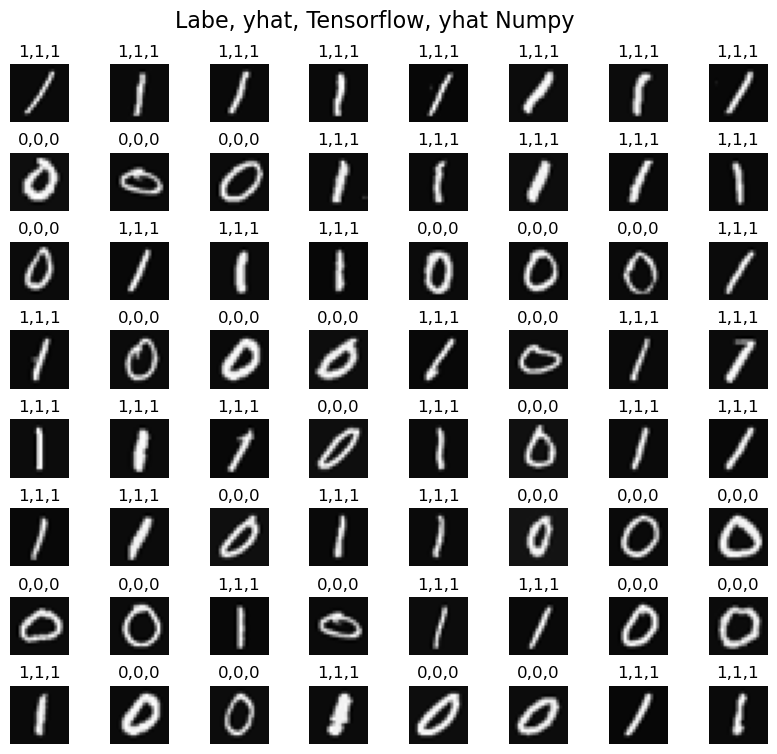

In [34]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig,axes = plt.subplots(8, 8, figsize=(8,8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
    my_yhat = int(my_prediction >= 0.5)
    
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off()
fig.suptitle("Labe, yhat, Tensorflow, yhat Numpy", fontsize=16)
plt.show()

In [35]:
Yhat.shape

NameError: name 'Yhat' is not defined